In [1]:
## Import the required basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Read the Dataset
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
## Drop the unnecessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis = 1, inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
## Check for Null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

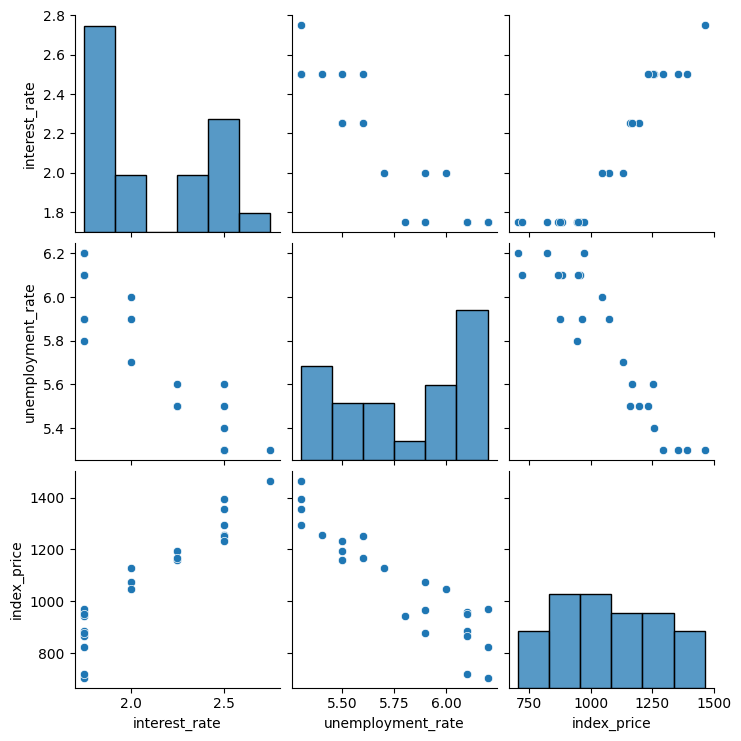

In [6]:
## Visualise using Seaborn
import seaborn as sns
sns.pairplot(df)

In [7]:
## Correlation Matrix
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


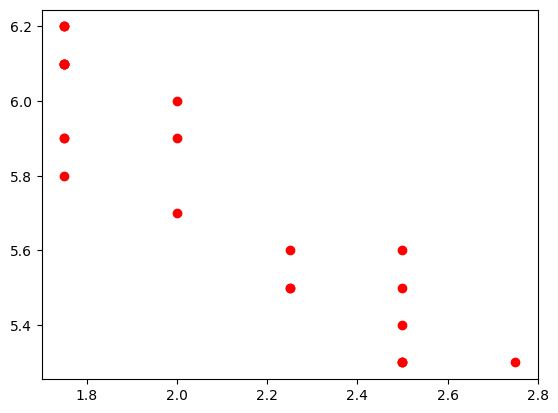

In [8]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color = 'r')
plt.xlabel('Interest Rate')

In [9]:
## Independent and Dependent Features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [11]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

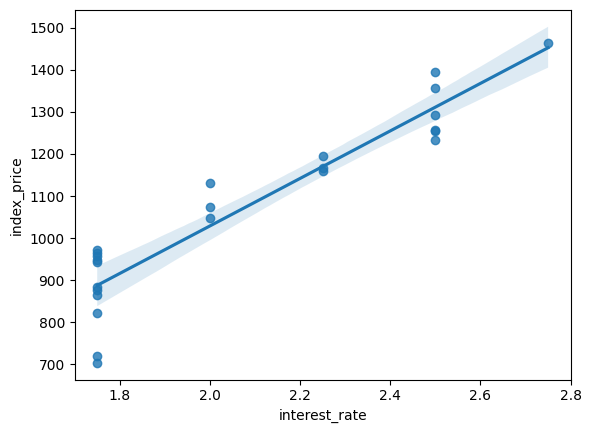

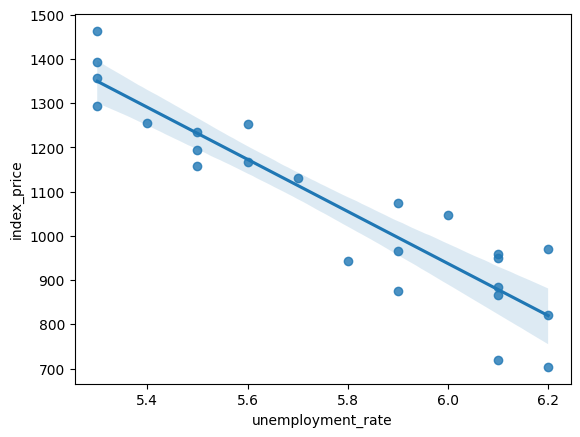

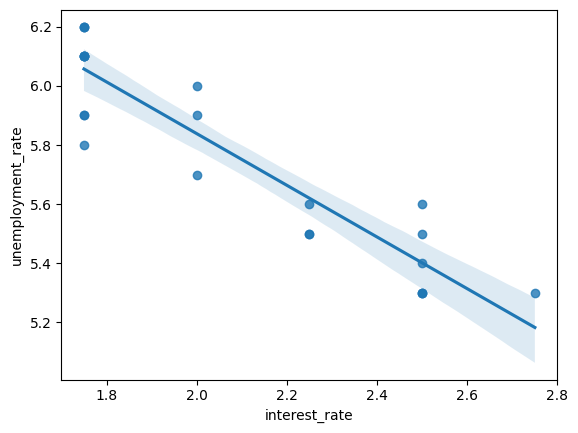

In [17]:
sns.regplot(x=df['interest_rate'], y=df['index_price'], data=df)
plt.show()
sns.regplot(x=df['unemployment_rate'], y=df['index_price'], data=df)
plt.show()
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'], data=df)
plt.show()

In [18]:
## Standard Scaling
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
## Train the Model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
## The Coefficients and Slope
print(f'Coefficient or Slope: {regression.coef_}')
print(f'Intercept: {regression.intercept_}')

Coefficient or Slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


In [22]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv = 3)

In [24]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [25]:
## Prediction
y_pred = regression.predict(X_test)

In [26]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 5793.7628877125835
MAE: 59.9357815232356
RMSE: 76.11677139574815


In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f'R-squared: {score}')
adj_r2 = 1 - ((1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print(f'Adj. R-squared: {adj_r2}')

R-squared: 0.8278978091457141
Adj. R-squared: 0.7131630152428567


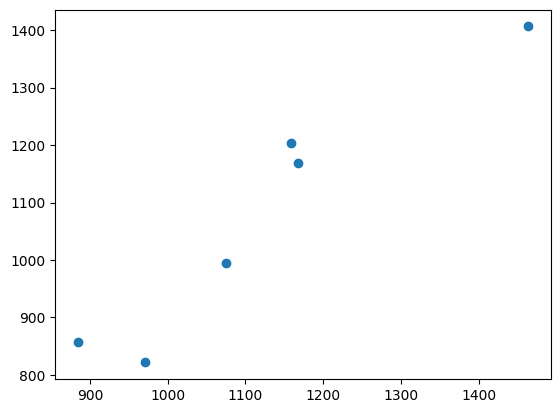

In [28]:
## Assumptions
plt.scatter(y_test, y_pred)

In [29]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


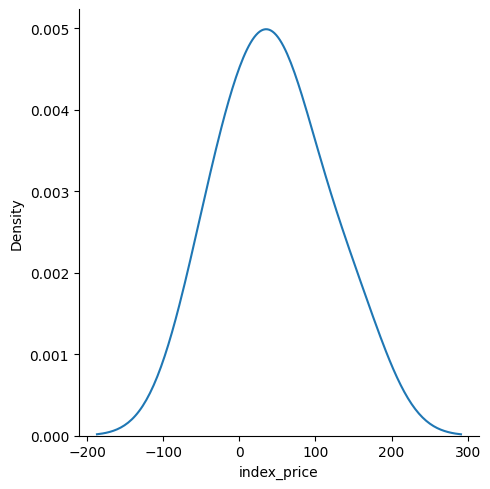

In [30]:
## Plot the residuals
sns.displot(residuals, kind='kde')

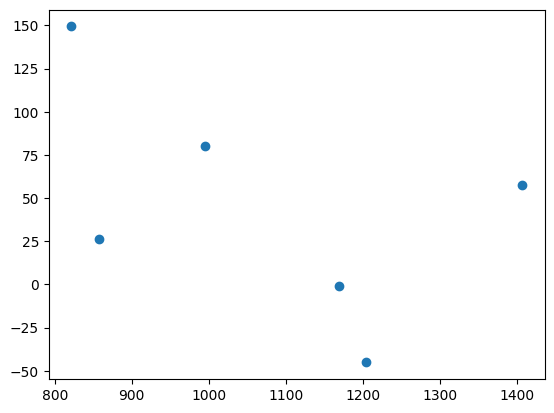

In [31]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [32]:
## OLS Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(f'OLS Prediction: {prediction}')
print(model.summary())

OLS Prediction: [ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 29 Dec 2024   Prob (F-statistic):                       0.754
Time:                        20:43:54   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 

/Users/sudhanvabharadwaj/Desktop/ML and NLP Bootcamp/Python Bootcamp/pyenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
